# **Анализ датасета и предварительная обработка**

In [613]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Изначальный датасет.

In [614]:
df = pd.read_csv('https://raw.githubusercontent.com/muradpo/andan_project/main/dataframe.csv', sep=',')
df. drop (columns=df. columns [0], axis= 1 , inplace= True )
df 

,ссылка,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,улица
0,https://mahachkala.cian.ru/rent/flat/287248550/,3000,Собственник,67,0,3,9,1,1,0,1,1,1,0,0,0,0,0,0,Кизилюртовская
1,https://mahachkala.cian.ru/rent/flat/287104371/,2000,Собственник,52,0,6,9,0,1,0,1,1,1,1,1,1,0,1,0,0
2,https://mahachkala.cian.ru/rent/flat/287170526/,2500,Собственник,44,24,7,10,1,1,0,1,1,1,1,1,1,0,1,0,Ленина
3,https://mahachkala.cian.ru/rent/flat/286285851/,1400,0,41,22,5,9,0,1,0,1,1,1,1,1,1,0,1,0,Приморская
4,https://mahachkala.cian.ru/rent/flat/283955383/,3500,Собственник,80,0,14,20,1,1,0,1,1,1,1,1,1,1,0,Ленинский,Времена Года
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,https://mahachkala.cian.ru/rent/flat/273952065/,2999,0,60,44,4,4,1,1,0,1,1,1,1,1,1,0,1,0,Советская
1376,https://mahachkala.cian.ru/rent/flat/274860429/,2500,0,45,0,1,2,1,1,0,1,1,1,1,1,1,1,1,Советский,Максима Горького
1377,https://mahachkala.cian.ru/rent/flat/281661559/,2700,Собственник,42,0,4,4,1,1,0,1,1,1,1,1,1,0,1,Кировский,Гусаева
1378,https://mahachkala.cian.ru/rent/flat/285834115/,1500,Собственник,26,0,12,12,1,1,0,1,1,1,1,1,1,1,0,0,Ленина


Полученные метки: ссылка,	цена, агенство,	общая площадь, жилая площадь, этаж,	всего этажей,	дети,	холодильник,	посудомойка,	стиральная машина,	мебель в комнатах,	мебель на кухне,	телевизор,	интернет,	кондиционер,	душ, ванна, район,	улица.
Размер нашего датафрейма изначального - 1380*20.

In [615]:
df.columns 
# колонки 'холодильник', 'посудомойка','стиральная машина', 'мебель в комнатах', 'мебель на кухне','телевизор', 'интернет', 'кондиционер', 'душ', 'ванна': 1 - значит, есть в квартире, 0 - значит, в квартире этого нет

Index(['ссылка', 'цена', 'агенство', 'общая площадь', 'жилая площадь', 'этаж',
       'всего этажей', 'Дети', 'холодильник', 'посудомойка',
       'стиральная машина', 'мебель в комнатах', 'мебель на кухне',
       'телевизор', 'интернет', 'кондиционер', 'душ', 'ванна', 'район',
       'улица'],
      dtype='object')

Обращу внимание, что изначально цена, общая площадь и жилая площадь имеют тип данных object.
Изначально данные имеют типы, с которыми в дальнейшем будет трудно работать.

In [616]:
df.dtypes #типы переменных


ссылка               object
цена                 object
агенство             object
общая площадь        object
жилая площадь        object
этаж                  int64
всего этажей          int64
Дети                  int64
холодильник           int64
посудомойка           int64
стиральная машина     int64
мебель в комнатах     int64
мебель на кухне       int64
телевизор             int64
интернет              int64
кондиционер           int64
душ                   int64
ванна                 int64
район                object
улица                object
dtype: object

Для удобства меняем типы данных и дополнительно обрабатываем такие показатели, как общая площадь, жилая площадь, улицы, цены.


In [617]:
df['общая площадь'] = [x.replace(',', '.') for x in df['общая площадь']] #поменяли на точку, чтобы питон адекватно воспринимал данные как нецелые числа
df['общая площадь'] = df['общая площадь'].astype('float64')
df['жилая площадь'] = [x.replace(',', '.') for x in df['жилая площадь']]

#одни и те же улицы некоторые пользователи писали с пробелом, так данные и сохранились
#дальше этот столбец будет использоваться, поэтому мы решили так обработать
df['улица'] = [x.replace(' ', '') for x in df['улица']] 

df['жилая площадь'] = df['жилая площадь'].astype('float64')
df = df.loc[~df['цена'].str.contains("мес")]
df['цена'] = df['цена'].astype('int64')
df = (df[df['цена']!=0]) #удалила строки, где посуточная цена - 0, иначе что нам делать с такими квартирами
df=df[df['цена'] != 35000] #удаляю выброс в цене


In [618]:
df.dtypes #добились того, что общая и жилая площади имеют тип float, а цена int

ссылка                object
цена                   int64
агенство              object
общая площадь        float64
жилая площадь        float64
этаж                   int64
всего этажей           int64
Дети                   int64
холодильник            int64
посудомойка            int64
стиральная машина      int64
мебель в комнатах      int64
мебель на кухне        int64
телевизор              int64
интернет               int64
кондиционер            int64
душ                    int64
ванна                  int64
район                 object
улица                 object
dtype: object

Видим, что уж очень сильно не соотносятся общие площади и жилые.

Решили удалить все квартиры, где площадь больше 200 - очень вероятно, что арендодатели ошиблись при оформлении заявления.

In [619]:
df.loc[df['общая площадь'] >=200] 
#удаляем эти квартиры

,ссылка,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,улица
237,https://mahachkala.cian.ru/rent/flat/287315593/,1500,Собственник,500.0,85.0,3,7,1,1,0,1,1,1,1,1,1,0,1,Ленинский,0
248,https://mahachkala.cian.ru/rent/flat/286590185/,3500,Собственник,555.0,50.0,1,9,1,1,0,1,1,1,1,1,1,1,0,Ленинский,0
528,https://mahachkala.cian.ru/rent/flat/249826605/,5000,0,800.0,75.0,7,10,1,1,0,1,1,1,1,1,1,0,1,Ленинский,Батырая
581,https://mahachkala.cian.ru/rent/flat/279272507/,1000,Собственник,350.0,35.0,4,4,1,1,0,0,1,1,1,1,0,0,0,Ленинский,Пушкина
653,https://mahachkala.cian.ru/rent/flat/274719160/,1500,0,280.0,0.0,13,13,1,1,0,1,1,1,1,1,1,1,1,0,0
809,https://mahachkala.cian.ru/rent/flat/278768135/,2000,Собственник,588.0,55.0,11,13,1,1,0,1,1,1,1,1,1,0,1,Ленинский,Сергокалинская
992,https://mahachkala.cian.ru/rent/flat/285935859/,2500,Собственник,555.0,50.0,6,12,0,1,0,1,1,1,1,1,1,0,1,Ленинский,ХаджиБулача
1077,https://mahachkala.cian.ru/rent/flat/271781344/,2500,0,550.0,45.0,2,3,1,1,0,1,1,1,1,1,1,0,1,Кировский,0
1095,https://mahachkala.cian.ru/rent/flat/255749941/,2500,Собственник,740.0,68.0,9,10,1,1,0,1,1,1,1,1,1,0,1,0,Халилова
1187,https://mahachkala.cian.ru/rent/flat/286782813/,3000,0,450.0,35.0,5,10,1,1,0,1,1,1,0,0,0,0,0,Ленинский,ИрчиКазака


In [620]:
df = df.loc[df['общая площадь'] < 200.00] #удалили!
df

,ссылка,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,улица
0,https://mahachkala.cian.ru/rent/flat/287248550/,3000,Собственник,67.0,0.0,3,9,1,1,0,1,1,1,0,0,0,0,0,0,Кизилюртовская
1,https://mahachkala.cian.ru/rent/flat/287104371/,2000,Собственник,52.0,0.0,6,9,0,1,0,1,1,1,1,1,1,0,1,0,0
2,https://mahachkala.cian.ru/rent/flat/287170526/,2500,Собственник,44.0,24.0,7,10,1,1,0,1,1,1,1,1,1,0,1,0,Ленина
3,https://mahachkala.cian.ru/rent/flat/286285851/,1400,0,41.0,22.0,5,9,0,1,0,1,1,1,1,1,1,0,1,0,Приморская
4,https://mahachkala.cian.ru/rent/flat/283955383/,3500,Собственник,80.0,0.0,14,20,1,1,0,1,1,1,1,1,1,1,0,Ленинский,ВременаГода
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,https://mahachkala.cian.ru/rent/flat/273952065/,2999,0,60.0,44.0,4,4,1,1,0,1,1,1,1,1,1,0,1,0,Советская
1376,https://mahachkala.cian.ru/rent/flat/274860429/,2500,0,45.0,0.0,1,2,1,1,0,1,1,1,1,1,1,1,1,Советский,МаксимаГорького
1377,https://mahachkala.cian.ru/rent/flat/281661559/,2700,Собственник,42.0,0.0,4,4,1,1,0,1,1,1,1,1,1,0,1,Кировский,Гусаева
1378,https://mahachkala.cian.ru/rent/flat/285834115/,1500,Собственник,26.0,0.0,12,12,1,1,0,1,1,1,1,1,1,1,0,0,Ленина


**Итог**: будем работать в итоге с датафреймом размером **1099*20**.

**Было удалено:**
 

*   квартиры, которые в изначальном датасете в колонке "цена" имели 0
*   выброс в цене (35к)
*   8 квартир, где была представлена цена не за сутки, а за месяц
*   квартиры с метражом более 200 кв метров

Основные признаки, на которые мы ориентируемся:

*   цена
*   общая площадь
*   жилая площадь
*   этаж



0 в столбце "агентство" - квартира сдается от лица собственника или нет 

0 в столбце "жилая площадь"- арендодатели не указали информацию - не будем ничем заполнять, так как замена на среднюю/медиану может оказаться тем, что метраж жилой площади будет больше, чем общая площадь квартиры 

0 в столбце "дети" - можно ли в квартире селиться с детьми 


Находим самые часто встречающиеся улицы. 

Дальше будем использовать их для построения графиков и проверки гипотез.


In [621]:
streets=(df.iloc[:,-1:].value_counts()).to_frame().iloc[1:,:]
streets.columns=['count']
all_streets = streets
streets = streets[streets['count']>15].reset_index(drop=False) #Оставили улицы, на которых количество квартир больше 15
streets

,улица,count
0,Ленина,79
1,просп.Акулиничева,36
2,просп.РасулаГамзатова,33
3,Кавказская,28
4,Лаптиева,26
5,МаксимаГорького,21
6,АбдулхакимаИсмаилова,20
7,Молодежная,20
8,Даниялова,19
9,ВременаГода,18


Находим самые часто встречающиеся районы. 

Дальше будем использовать их для построения графиков и проверки гипотез.


In [622]:
districts=(df['район'].value_counts()).to_frame().reset_index(drop=False)
districts.columns=['район','count']
districts =districts[districts.район != '0']
districts

,район,count
0,Ленинский,424
2,Советский,213
3,Кировский,93
4,Кемпинг микро,1


In [623]:
#нашли для цены эти значения - будем ориентироваться на них при формулировке гипотез
print(df.цена.mean())
print(df.цена.median())
print(df.цена.mode())
print(df.цена.var())
print(df.цена.std())
print(df.цена.quantile(0.99))

2619.9417652411285
2500.0
0    2500
dtype: int64
1043644.808991784
1021.5893543845218
6000.0


In [624]:
#теперь для общей площади квартиры
print(df['общая площадь'].mean())
print(df['общая площадь'].median())
print(df['общая площадь'].mode())
print(df['общая площадь'].var())
print(df['общая площадь'].std())
print(df['общая площадь'].quantile(0.99))

56.906733393994536
52.0
0    50.0
dtype: float64
360.4237797567264
18.984830253566304
120.0


# **Визуализация**

In [625]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


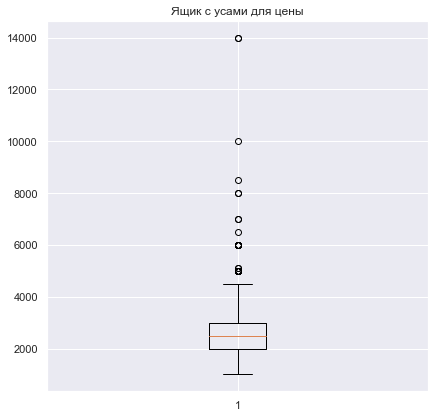

In [626]:
plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.title("Ящик с усами для цены")
plt.boxplot(df.цена);

По ящику с усами видно, что в данных есть значительные выбросы. Например, цена равная 14000. По ценам квартир мы дальше будем создавать признак и ранжировать по категориям.


Медиана цен находится на уровне ~2600 рублей.

Изначально мы оставили выброс в 14000 (так как до этого уже удаляли цену в 35к), так как все равно должно быть более-менее элитное жилье в выборке. Доделав проект до конца, а точнее часть с мо, решили все-таки его удалить - итоговые метрики получаются лучше :)
Так что датасет уменьшается на две строчку. 

In [627]:
df=df[df['цена'] != 14000] 
df

,ссылка,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна,район,улица
0,https://mahachkala.cian.ru/rent/flat/287248550/,3000,Собственник,67.0,0.0,3,9,1,1,0,1,1,1,0,0,0,0,0,0,Кизилюртовская
1,https://mahachkala.cian.ru/rent/flat/287104371/,2000,Собственник,52.0,0.0,6,9,0,1,0,1,1,1,1,1,1,0,1,0,0
2,https://mahachkala.cian.ru/rent/flat/287170526/,2500,Собственник,44.0,24.0,7,10,1,1,0,1,1,1,1,1,1,0,1,0,Ленина
3,https://mahachkala.cian.ru/rent/flat/286285851/,1400,0,41.0,22.0,5,9,0,1,0,1,1,1,1,1,1,0,1,0,Приморская
4,https://mahachkala.cian.ru/rent/flat/283955383/,3500,Собственник,80.0,0.0,14,20,1,1,0,1,1,1,1,1,1,1,0,Ленинский,ВременаГода
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,https://mahachkala.cian.ru/rent/flat/273952065/,2999,0,60.0,44.0,4,4,1,1,0,1,1,1,1,1,1,0,1,0,Советская
1376,https://mahachkala.cian.ru/rent/flat/274860429/,2500,0,45.0,0.0,1,2,1,1,0,1,1,1,1,1,1,1,1,Советский,МаксимаГорького
1377,https://mahachkala.cian.ru/rent/flat/281661559/,2700,Собственник,42.0,0.0,4,4,1,1,0,1,1,1,1,1,1,0,1,Кировский,Гусаева
1378,https://mahachkala.cian.ru/rent/flat/285834115/,1500,Собственник,26.0,0.0,12,12,1,1,0,1,1,1,1,1,1,1,0,0,Ленина


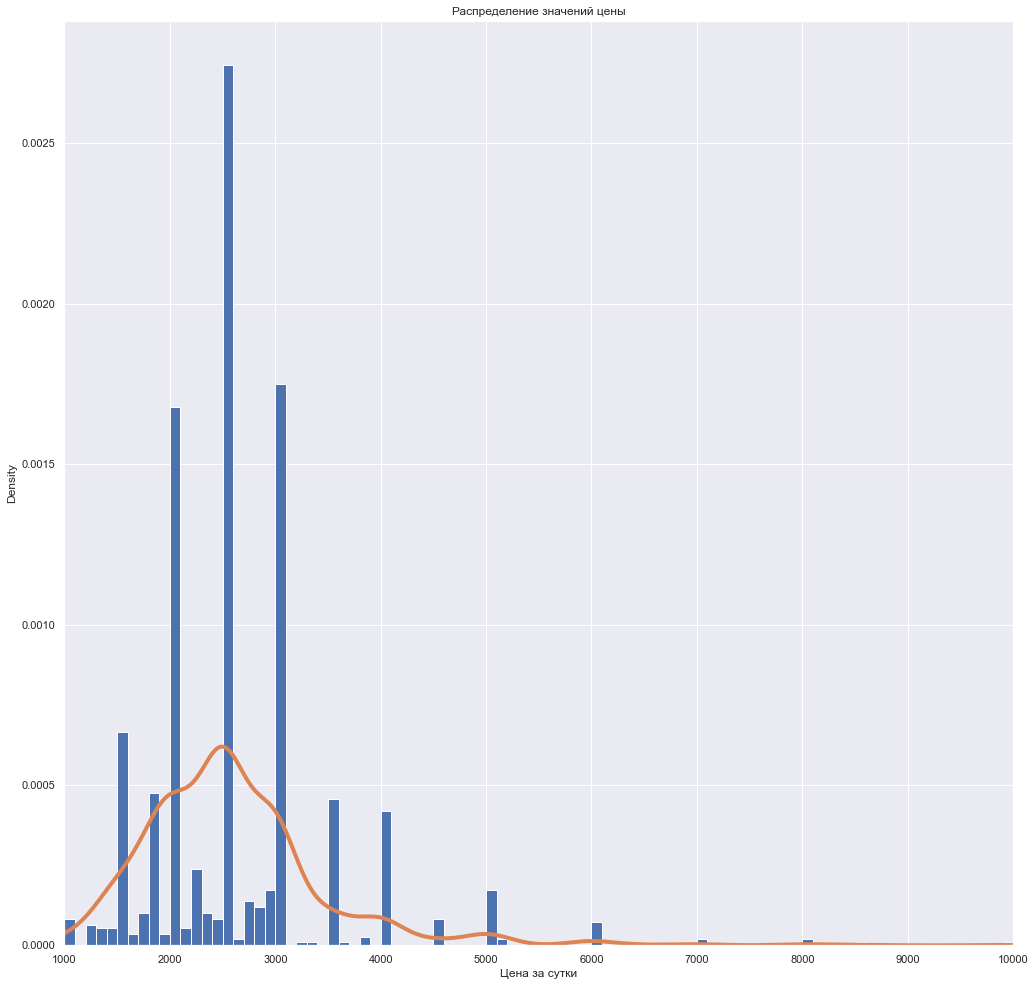

In [628]:
plt.figure(figsize = (17,17))
df.цена.hist(bins=90,density = True);
df.цена.plot(kind='kde', linewidth=4)
plt.xlim(1000, 10000)
plt.xlabel("Цена за сутки")
plt.title("Распределение значений цены");

Есть выбросы. Цены почти всех квартир распределены в отрезке от 1000 до 6000 рублей. Есть несколько мод. Самое частое значение цены: 2600-2800. Минимальное значение цены: 1000. Максимальное: 10000.

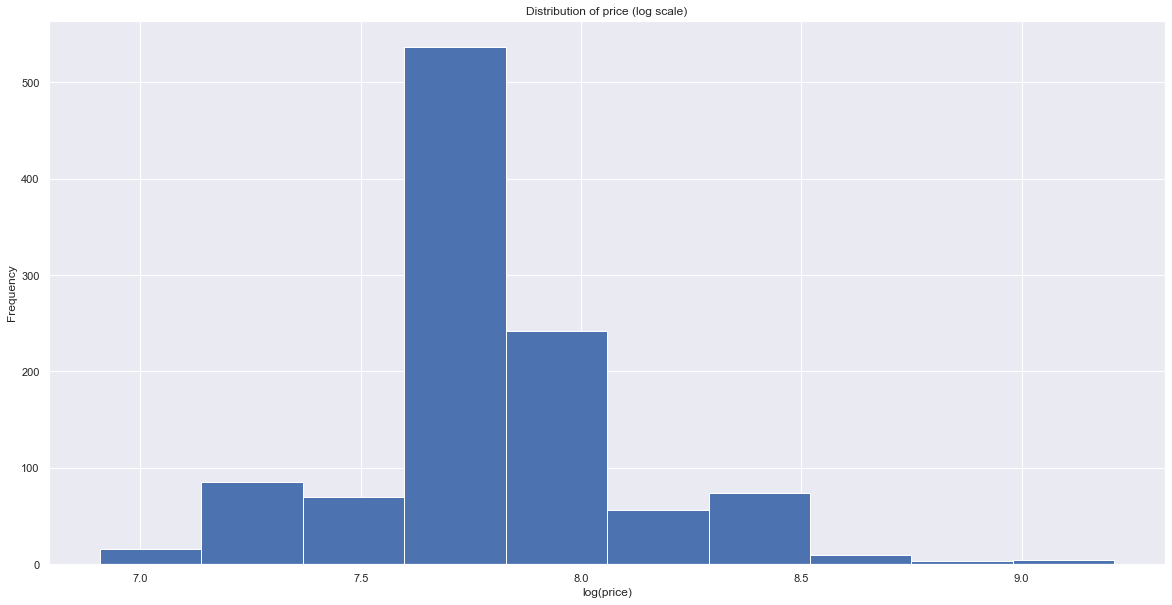

In [629]:
#логарифмируем значения цен - чтобы выбросы сгладились
prices = df.цена.apply(lambda x: np.log(x ))
df.цена.apply(lambda x: np.log(x )).hist(figsize=(20, 10));
plt.xlabel("log(price)")
plt.ylabel('Frequency')
plt.title("Distribution of price (log scale)");

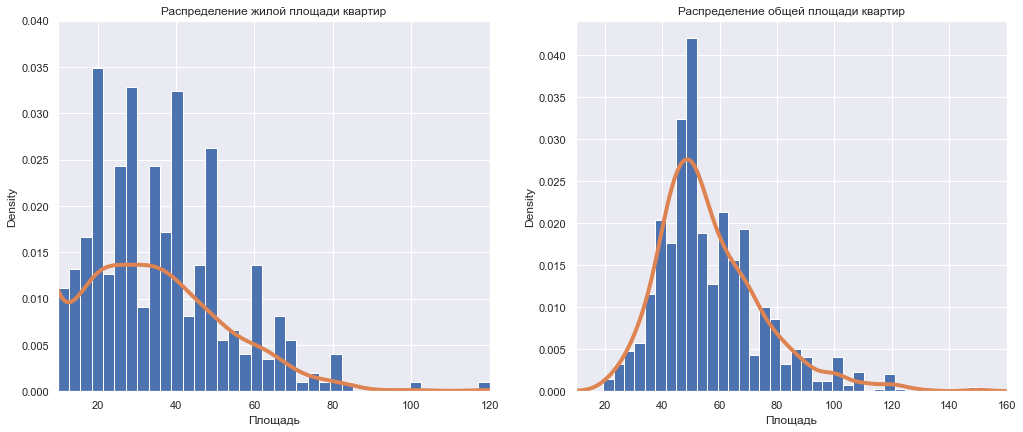

In [630]:
plt.figure(figsize = (17,15))
plt.subplot(2, 2, 1)
df[df['жилая площадь']!=0]['жилая площадь'].hist(bins=40, density=True) #распределение жилой площади квартир, у которых есть эта инфа на сайтах
df['жилая площадь'].plot(kind='kde', linewidth=4)
plt.xlim(10, 120)
plt.ylim(0,0.04)
plt.xlabel("Площадь")
plt.title("Распределение жилой площади квартир")
plt.subplot(2, 2, 2)
df['общая площадь'].hist(bins=40, density=True)
df['общая площадь'].plot(kind='kde', linewidth=4)
plt.xlim(10, 160)
plt.xlabel("Площадь")
plt.title("Распределение общей площади квартир");

Наиболее часто встречающийся метраж жилой площади - 20 кв. м

Наиболее часто встречающийся метраж общей площади - 50 кв. м
Несколько мод на первом графике. Мода на втором% 48-52 кв метра. Есть выбросы и слева и справа. Максимальное значение жилой площади 120 кв метров.

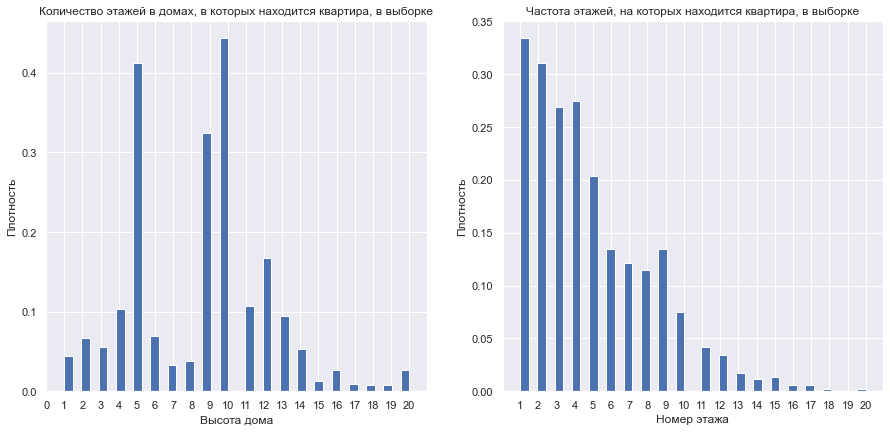

In [631]:
plt.figure(figsize = (15,15))
plt.subplot(2, 2, 1)
plt.xlabel("Высота дома")
plt.ylabel("Плотность")
plt.title("Количество этажей в домах, в которых находится квартира, в выборке")
df['всего этажей'].hist(bins=40, density=True)
plt.xticks(range(21))
plt.subplot(2, 2, 2)
plt.xlabel("Номер этажа")
plt.title("Частота этажей, на которых находится квартира, в выборке")
plt.ylabel("Плотность")
plt.xticks(range(21))
df["этаж"].hist(bins=40, density=True);


Наиболее часто квартиры сдаются на 1-2 этажах. С увеличением этажа частота снижается.
Наиболее часто встречающаяся этажность - 5, 9, 10 этажей в доме.

Найдем корреляции между признаками.

In [632]:
colnames = df.dtypes[(df.dtypes == 'int64') | (df.dtypes == 'float64')].index.values
(df[colnames].corr(method='pearson'))


,цена,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,мебель на кухне,телевизор,интернет,кондиционер,душ,ванна
цена,1.000000,0.445796,0.088444,0.168580,0.228689,0.054994,-0.007595,0.150447,0.090997,-0.027256,-0.017125,0.107874,0.127758,0.180570,0.087657,-0.027389
общая площадь,0.445796,1.000000,0.305615,0.094123,0.194261,0.102273,-0.019025,0.033212,0.096541,-0.010499,-0.075479,0.071416,0.086670,0.093950,-0.073681,0.077346
жилая площадь,0.088444,0.305615,1.000000,-0.025879,-0.035129,0.042298,0.037292,-0.062400,0.064771,0.018634,0.068299,0.010551,0.017010,0.051247,-0.066504,0.061597
этаж,0.168580,0.094123,-0.025879,1.000000,0.615625,0.024003,-0.020985,0.020730,-0.049104,-0.032603,0.009728,0.020459,0.039277,0.048047,0.011613,0.012202
всего этажей,0.228689,0.194261,-0.035129,0.615625,1.000000,-0.013546,0.014631,-0.005455,0.028665,0.000109,0.031757,0.040477,0.064453,0.065131,-0.025574,0.056250
Дети,0.054994,0.102273,0.042298,0.024003,-0.013546,1.000000,0.136273,0.041794,0.083547,0.145744,0.126270,0.076721,0.084752,0.060048,-0.017660,0.116987
холодильник,-0.007595,-0.019025,0.037292,-0.020985,0.014631,0.136273,1.000000,-0.025322,0.411638,0.648947,0.660659,0.228937,0.183747,0.178236,-0.003355,0.153394
посудомойка,0.150447,0.033212,-0.062400,0.020730,-0.005455,0.041794,-0.025322,1.000000,0.042256,0.024466,-0.004476,0.074514,0.068288,0.081552,0.079168,-0.008313
стиральная машина,0.090997,0.096541,0.064771,-0.049104,0.028665,0.083547,0.411638,0.042256,1.000000,0.376399,0.310888,0.252260,0.197735,0.244605,0.042166,0.152717
мебель в комнатах,-0.027256,-0.010499,0.018634,-0.032603,0.000109,0.145744,0.648947,0.024466,0.376399,1.000000,0.461107,0.159832,0.121304,0.152019,0.011805,0.110262


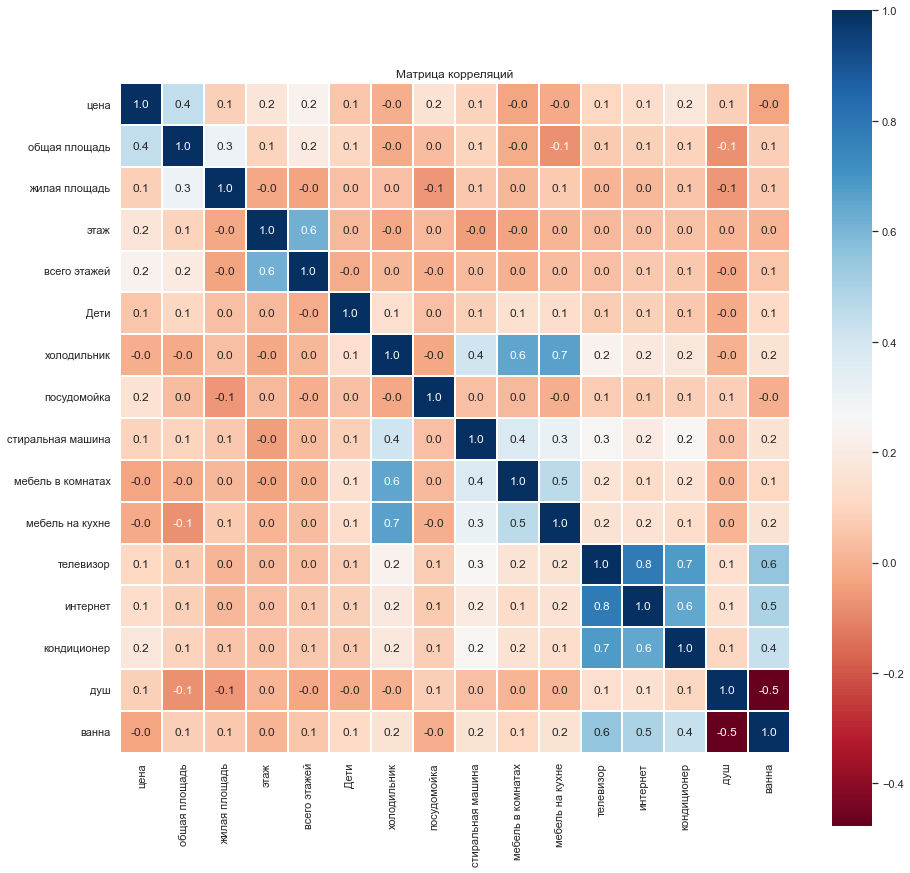

In [633]:
plt.figure(figsize = (15,15))
plt.title('Матрица корреляций')
sns.heatmap(df[colnames].corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

Наибольшая корреляция наблюдается между:
- интернетом и телевизором (0.8);
- телевизором и кондиционером (0.7);
- холодильником и мебелью на кухне (0.7)

Некоторые результаты интуитивно понятны (например, холодильник и кухонная мебель), связь между телевизором и кондиционером не так очевидна (однако телевизор есть в подавляющем числе квартир (952) и весьма вероятно они стоят в гостиных, куда хозяева и устанавливают кондиционеры для удобства гостей).

Душ и ванная взаимоисключающие пункты, поэтому корреляция отрицательная - практически всегда, если в квартире есть ванна, дополнительно не устанавливают еще и душ, и наоборот.

Есть признаки, которые не коррелируют в целом ни с чем - например, признак "дети", что логично, так как остальные признаки касались характеристик квартиры.

Значения коэффициента корреляции говорят о силе линейной связи. Мы не можем сделать выводы о причинно-следственной связи, основываясь только на нем.

Смотрим внимательнее, в скольких квартирах есть следующее:

In [634]:
df.душ.value_counts()

0    940
1    157
Name: душ, dtype: int64

In [635]:
df.ванна.value_counts()

1    829
0    268
Name: ванна, dtype: int64

In [636]:
df.телевизор.value_counts()

1    950
0    147
Name: телевизор, dtype: int64

In [637]:
df.кондиционер.value_counts()

1    880
0    217
Name: кондиционер, dtype: int64

Самая очевидная зависимость: зависимость цены от общей площади квартиры. Диаграммы ниже позволяют увидеть зависимость между этими столбцами, объединяя диаграмму рассеивания и гистограмму. Снова видим, что большая часть квартир сдается в диапазоне от 2000 до 4000 рублей за сутки. А средняя жилая площадь таких квартир - 50 кв метров.

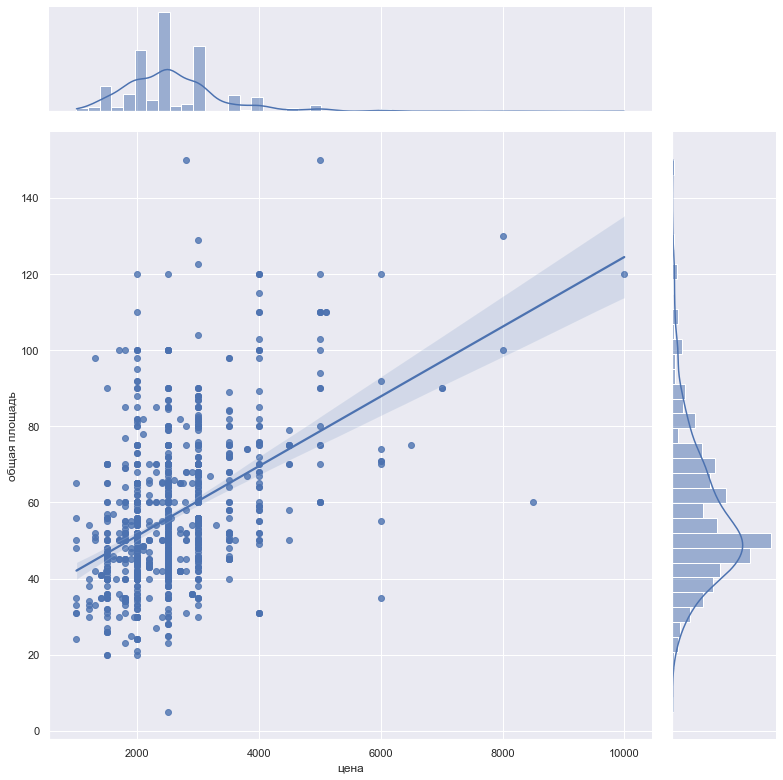

In [638]:
sns.set(rc = {'figure.figsize':(18,7)})

sns.jointplot(x="цена", y="общая площадь", data=df, kind="reg", height = 11, palette=("Spectral"));


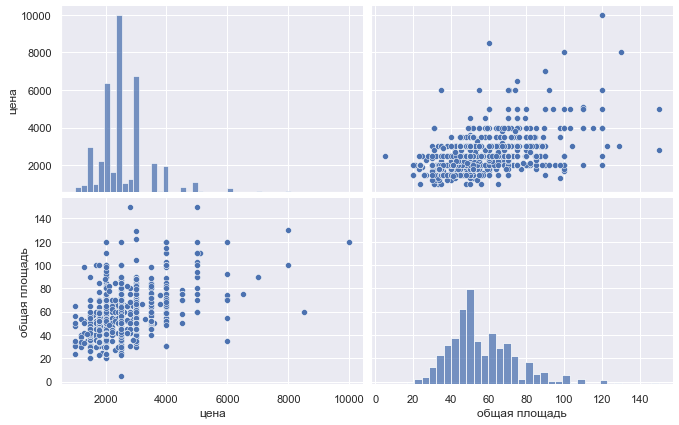

In [639]:
sns.set(rc = {'figure.figsize':(18,20)})

sns_plot = sns.pairplot(df[['цена', 'общая площадь']], height=3, aspect=1.6)


### Посмотрим как попарно соотносятся друг с другом самые важные признаки из датасета с помощью такой штуки из сиборна.

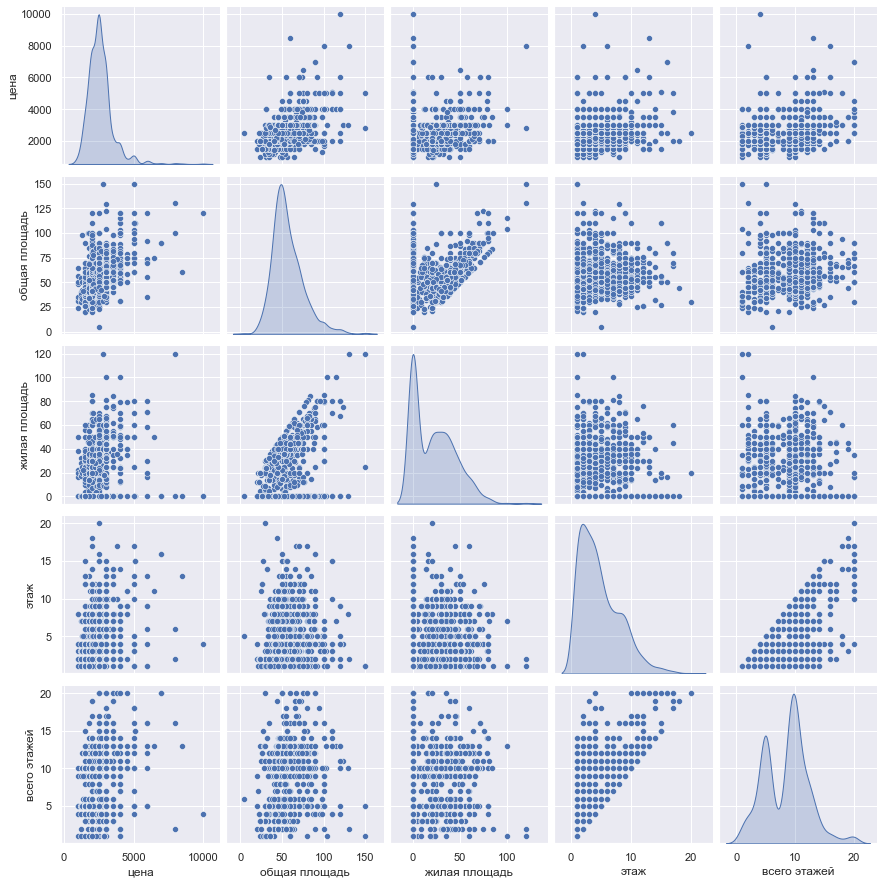

In [640]:
sns.set(rc = {'figure.figsize':(18,7)})

sns.pairplot(df.iloc[:,1:7],diag_kind = "kde",kind = "scatter",palette = "Spectral");


### Посчитаем распределение квартир по этажам - будем дальше использовать эту информацию в предположении гипотез.

In [641]:
floor = df['этаж'].value_counts().to_frame().reset_index(drop=False) #посчитаем распределение квартир по этажам из выборки
floor.columns=['этаж','count']


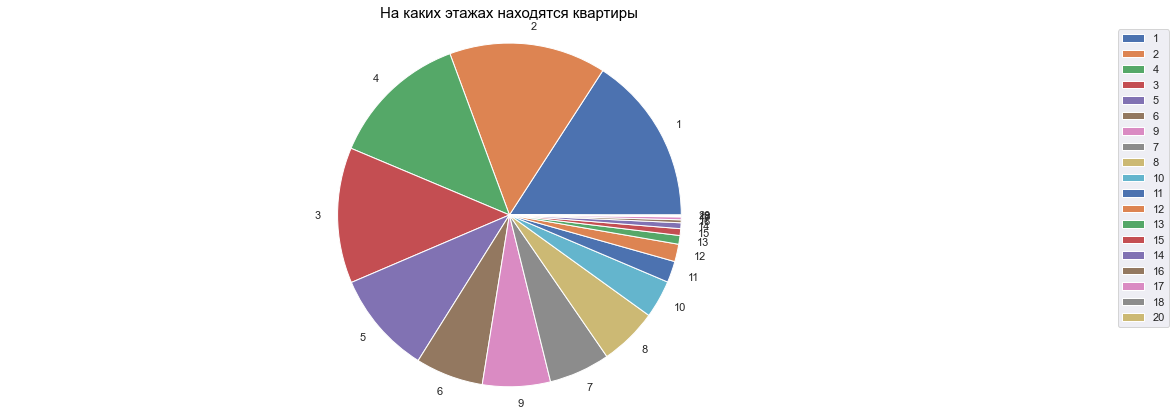

In [642]:
#да, немножко налепилось, но куда более увеличивать масштаб(
fig, ax = plt.subplots()

ax.pie(floor['count'], labels=floor.этаж,  radius = 15000)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("На каких этажах находятся квартиры", fontsize=15, color="black");

## Теперь посмотрим распределение квартир по улицам города - также будем использовать дальше в предположении гипотез.

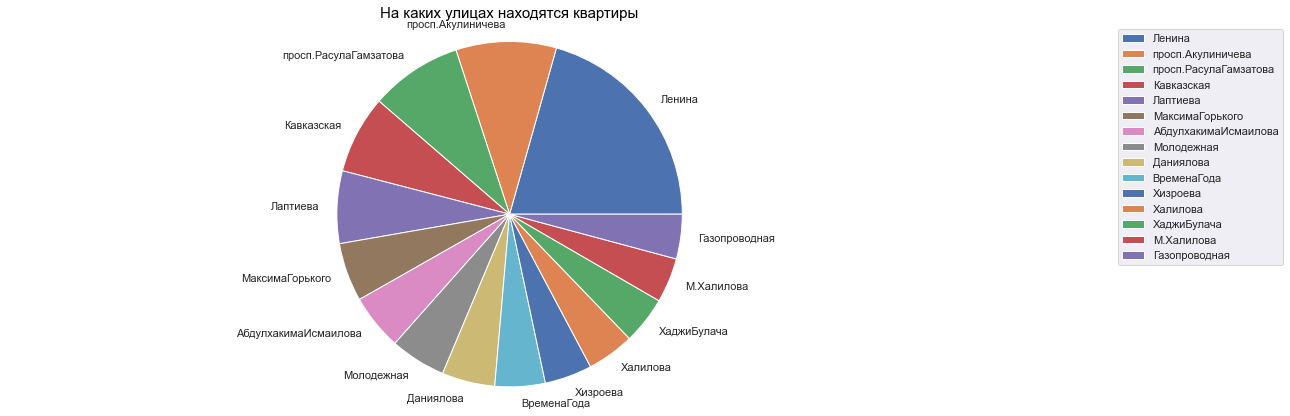

In [643]:
fig, ax = plt.subplots()
ax.pie((streets['count']), labels=streets.улица,  radius = 1000)
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("На каких улицах находятся квартиры", fontsize=15, color="black");

Больше всего квартир сдаются на улице Ленина.

### Ну и напоследок - распределение по районам города.

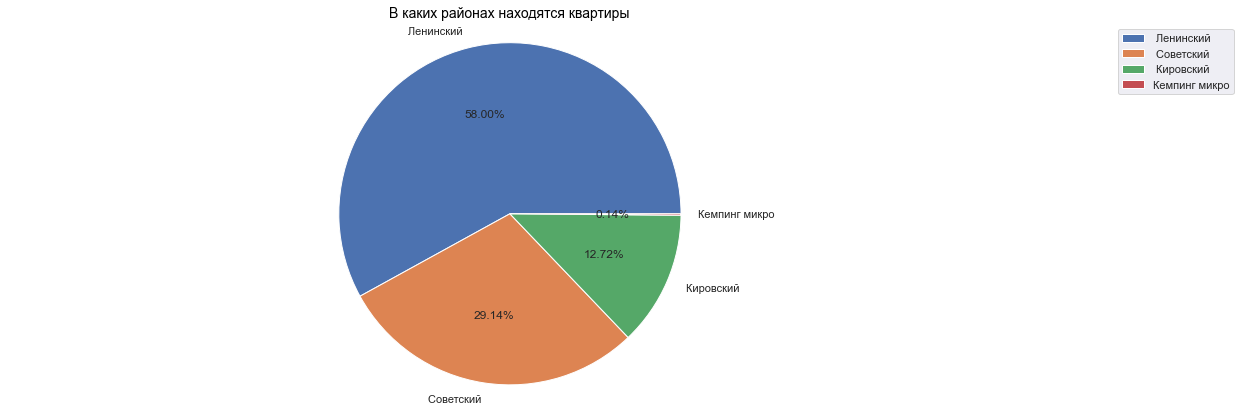

In [644]:
fig, ax = plt.subplots()
ax.pie((districts['count']), labels=districts.район, autopct='%1.2f%%')
ax.axis('equal')
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.0))
ax.set_title("В каких районах находятся квартиры", fontsize=14, color="black");

Самый популярный район для сдачи квартир - Ленинский. На втором месте - Советский, на 3 - Кировский.

#### Трехмерная проекция

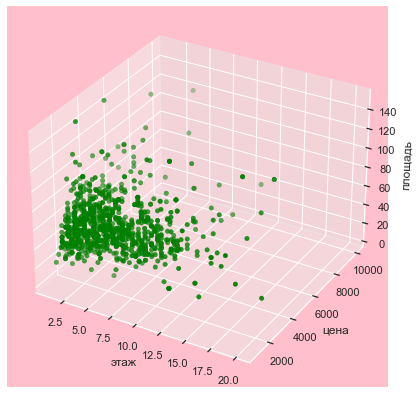

In [645]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d', facecolor='pink')

x = df['этаж']
y = df['цена']
z = df['общая площадь']

ax.scatter(x, y, z, color='green', linewidth= 0.4)
ax.set_xlabel("этаж")
ax.set_ylabel("цена")
ax.set_zlabel("площадь");
#просто посмотрим как цена, плоащдь и этаж разбросаны в трехмерном пространстве

# **Создание новых признаков**

## Налог на продажу
Сколько арендодатели должны выплатить налога со своего дохода как физические лица?

(но скорее всего никогда не выплатят ибо никто не контролирует)

In [646]:
tax = np.zeros(len(df))
k = 0
for i in range(len(df)):
    tax[i] = df['цена'].iloc[i]*0.13
df['Стандартный налог на продажу'] = tax


## Оценка стоимости по категориям
По нашему субъективному взгляду.

In [647]:
cat = [0]*len(df)
for i in range(len(df)):
  if df["цена"].iloc[i]<=2000:
    cat[i] = 'бюджетно'
  elif df['цена'].iloc[i]>=3000:
    cat[i] = 'дорого'
  else:
    cat[i] = 'средне'
df['дороговизна'] = cat
df['дороговизна'].value_counts()

средне      402
бюджетно    356
дорого      339
Name: дороговизна, dtype: int64

## Оценка площади квартир
Мы узнали средний метраж квартир трешек и двушек - здесь разбиваем по таким категориям.

In [648]:
area = [0]*len(df)
for i in range(len(df)):
  if df['общая площадь'].iloc[i]>=70:
    area[i] = 'большая'
  elif df['общая площадь'].iloc[i] >=45:
    area[i] = 'средняя'
  else:
    area[i] = 'маленькая'
df['размер'] = area
df['размер'].value_counts()

средняя      601
маленькая    259
большая      237
Name: размер, dtype: int64

## Квартиры рядом с морем

Проанализировали улицы из датасета и ототбрали те, которые находятся в пешей доступности от моря.

In [649]:
by_the_sea = ["просп.Акулиничева","просп. РасулаГамзатова","Лаптиева", "МаксимаГорького", "Даниялова", "ВременаГода", "ХаджиБулача", "Халилова", "М.Халилова", "Орджоникидзе", "Гапцахская", "Гапцахская","Советская","Габитова","Магарамкентская", "Заморская","Заморская"]
list_by_the_sea = [0]*len(df)
prices_by_the_sea = []
prices_not_by_the_sea = []
for i in range(len(df)):
  for k in range(len(by_the_sea)):
    if df["улица"].iloc[i] == by_the_sea[k]:
      list_by_the_sea[i] = 1
      prices_by_the_sea.append(df.iloc[i][1])
  if list_by_the_sea[i] ==0:
    prices_not_by_the_sea.append(df.iloc[i][1])
df['рядом с морем'] = list_by_the_sea
df['рядом с морем'].value_counts()

0    848
1    249
Name: рядом с морем, dtype: int64

## Теперь датасет выглядит так!

In [650]:
df 

,ссылка,цена,агенство,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,...,интернет,кондиционер,душ,ванна,район,улица,Стандартный налог на продажу,дороговизна,размер,рядом с морем
0,https://mahachkala.cian.ru/rent/flat/287248550/,3000,Собственник,67.0,0.0,3,9,1,1,0,...,0,0,0,0,0,Кизилюртовская,390.00,дорого,средняя,0
1,https://mahachkala.cian.ru/rent/flat/287104371/,2000,Собственник,52.0,0.0,6,9,0,1,0,...,1,1,0,1,0,0,260.00,бюджетно,средняя,0
2,https://mahachkala.cian.ru/rent/flat/287170526/,2500,Собственник,44.0,24.0,7,10,1,1,0,...,1,1,0,1,0,Ленина,325.00,средне,маленькая,0
3,https://mahachkala.cian.ru/rent/flat/286285851/,1400,0,41.0,22.0,5,9,0,1,0,...,1,1,0,1,0,Приморская,182.00,бюджетно,маленькая,0
4,https://mahachkala.cian.ru/rent/flat/283955383/,3500,Собственник,80.0,0.0,14,20,1,1,0,...,1,1,1,0,Ленинский,ВременаГода,455.00,дорого,большая,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,https://mahachkala.cian.ru/rent/flat/273952065/,2999,0,60.0,44.0,4,4,1,1,0,...,1,1,0,1,0,Советская,389.87,средне,средняя,1
1376,https://mahachkala.cian.ru/rent/flat/274860429/,2500,0,45.0,0.0,1,2,1,1,0,...,1,1,1,1,Советский,МаксимаГорького,325.00,средне,средняя,1
1377,https://mahachkala.cian.ru/rent/flat/281661559/,2700,Собственник,42.0,0.0,4,4,1,1,0,...,1,1,0,1,Кировский,Гусаева,351.00,средне,маленькая,0
1378,https://mahachkala.cian.ru/rent/flat/285834115/,1500,Собственник,26.0,0.0,12,12,1,1,0,...,1,1,1,0,0,Ленина,195.00,бюджетно,маленькая,0


# **ГИПОТЕЗЫ**
## **Первая гипотеза:** 
Используем новый признак.  


H0: Средняя цена по квартирам, находящихся рядом с морем равна средней цене по квартирам, находящихся не рядом с морем.

H1: Средняя цена по квартирам, находящихся рядом с морем выше средней цены по квартирам, находящихся не рядом с морем.


$$
\begin{aligned}
& H_0: \mu_{рядом} = \mu_{далеко} \\
& H_1: \mu_{рядом} > \mu_{далеко}
\end{aligned}
$$






In [651]:
import scipy.stats as stats
import pandas as pd
from statsmodels. stats.weightstats import ztest, ttest_ind
from statsmodels.stats.descriptivestats import sign_test
alpha = 0.05 
#все гипотезы проверяются на уровне значимости = 0.05

In [652]:
prices_by_the_sea = pd.DataFrame(prices_by_the_sea)
prices_not_by_the_sea = pd.DataFrame(prices_not_by_the_sea)
diff = (prices_by_the_sea).mean() - (prices_not_by_the_sea).mean()
diff_std = np.sqrt(prices_by_the_sea.var(ddof=1)/len(prices_by_the_sea) + prices_not_by_the_sea.var(ddof=1)/len(prices_not_by_the_sea))
z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha)
pval = 2*stats.norm.cdf(-z_obs)
if (z_crit > z_obs).any: 
    print(f"Нулевая гипотеза отвергается, так как расчетное значение  больше критического.")
else:
    print('Нулевая гипотеза не отвергается')

Нулевая гипотеза отвергается, так как расчетное значение  больше критического.


А значит средняя цена по квартирам, находящихся рядом с морем выше средней цены по квартирам, находящихся не рядом с морем.

## Вторая гипотеза:
$$
\begin{aligned}
& H_0: \mu_{цена} = 2600 \\
& H_1: \mu_{цена}\neq 2600
\end{aligned}
$$

В следующей гипотезе с помощью бутстрапа проверяем равняется ли истинное математическое ожидание цены к 2600.

In [653]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size 
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample
x=df.цена    
x_boot = get_bootstrap_sample(x)


2546.510483135825 2653.243459434822


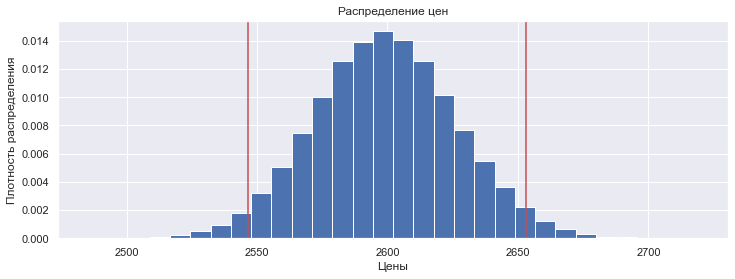

In [654]:
#доверительный интервал Эфрона
x_boot = get_bootstrap_sample(x, B_sample=10**5)
x_boot_m = np.mean(x_boot, axis=0)
left = np.quantile(x_boot_m, alpha/2)
right = np.quantile(x_boot_m, 1-alpha/2)
print(left, right)
fig = plt.figure(figsize=(12,4))
plt.hist(x_boot_m, bins=30, density=True)
plt.axvline(left, color='r')
plt.axvline(right, color='r');
plt.title('Распределение цен')
plt.xlabel('Цены')
plt.ylabel('Плотность распределения');

2600 попадает в доверительный интервал - нулевая гипотеза не отвергается.

## Третья гипотеза:
Используем признак, придуманный нами - субъективная оценка размера квартиры.

$$
\begin{aligned}
& H_0: \mu_{маленькая} =  \mu_{средняя} \\
& H_1: \mu_{маленькая}\neq  \mu_{средняя}
\end{aligned}
$$

Проверим, равняются ли цены маленьких и средних квартир, предполагая, что неизвестные дисперсии равны - используем **t-test**.

In [655]:
small = df[df.размер == 'маленькая'].цена
medium = df[df.размер == 'средняя'].цена
#предполагаем, что неизвестные дисперсии равны
print('Неизвестные равные дисперсии.')
if stats.ttest_ind(small,medium, equal_var=True)[1] > alpha:
    print(f'Нулевая гипотеза не отвергается, так как p-value {stats.ttest_ind(small,medium, equal_var=True)[1]} меньше уровня значимости.\n')
else:
    print(f'Нулевая гипотеза отвергается, так как p-value {stats.ttest_ind(small,medium, equal_var=True)[1]} меньше уровня значимости.\n')
#предполагаем, что неизветсные дисперсии НЕравны, используем t-критерий Уэлча
print('Неизвестные неравные дисперсии.')
if stats.ttest_ind(small,medium, equal_var=False)[1] > alpha:
    print(f'Нулевая гипотеза не отвергается, так как p-value {stats.ttest_ind(small,medium, equal_var=False)[1]} меньше уровня значимости.\n')
else:
    print(f'Нулевая гипотеза отвергается, так как p-value {stats.ttest_ind(small,medium, equal_var=False)[1]} меньше уровня значимости.\n')

Неизвестные равные дисперсии.
Нулевая гипотеза отвергается, так как p-value 7.330352428536398e-15 меньше уровня значимости.

Неизвестные неравные дисперсии.
Нулевая гипотеза отвергается, так как p-value 4.3654070541500524e-16 меньше уровня значимости.



**Средние цены маленьких и средних квартир не равны.**

## Четвертая гипотеза:
Как мы увидели на графике, самый "популярный" этаж среди всех квартир - первый. Проверим, как в среднем владельцы такого жилья оценивают ее стоимость.

$$
\begin{aligned}
&H_0: \hspace {2mm} \mu1 = \mu2 \hspace{2mm} \text{( Средняя цена за квартиры на первом этаже и за квартиры выше первого равна)} \\
&H_1: \hspace {2mm} \mu1 < \mu2  \hspace{2mm} \text{(Средняя цена за квартиры на первом этаже меньше средней цены за квартиры выше первого)}
\end{aligned}
$$

In [656]:
n1,n2 = df[(df['этаж'] <2)].цена, df[(df['этаж'] >=2)].цена  
ztest(n1,n2, value = 0 )
pval=stats.ttest_ind(n1,n2, alternative = 'less')[1]
print(f'p-value {pval} меньше уровня значимости -> Нулевая гипотеза отвергается')

p-value 0.024793927298931588 меньше уровня значимости -> Нулевая гипотеза отвергается


**Вывод:** В среднем суточная цена за квартиры на первом этаже меньше, чем за квартиры, которые находятся выше.

## Пятая гипотеза:
Проверим гипотезу о том, что медиана цены  равна $2500$ с помощью непараметрического критерия знаков для одной выборки.

$H_0\colon Med(X) = 2500$

$H_1\colon Med(X) \ne 2500$

In [657]:
from statsmodels.stats.descriptivestats import sign_test

x = df['цена'].values
T, pvalue = sign_test(x, mu0=2500)
if pvalue>alpha:
    print(f'H0 не отвергается - медиана равняется 2500, так как p-val {pvalue} > {alpha}')
else:
    print(f'H0 отвергается  - медиана не равняется 2500, так как p-val {pvalue} < {alpha}')


H0 не отвергается - медиана равняется 2500, так как p-val 0.5237646822518989 > 0.05


## Шестая гипотеза:
Будем проверять, выше ли средняя цена за сутки на улице Лаптиева (рядом с морем, туристическая улица), чем на улице Газопроводной (далеко от моря, нетуристическая улица, далеко от центра)? Используем ранговый критерий Манна-Уитни (который можно использовать на малых выборках).

$H_0\colon f_{X}(x) = f_{Y}(x)$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

In [658]:
laptieva= df[df['улица'] == "Лаптиева"].цена
gazop = df[df['улица'] == "Газопроводная"].цена
pval = stats.mannwhitneyu(laptieva, gazop, alternative='greater')[1]
print(f"p-val {pval} меньше уровня значимости -> нулевая гипотеза отвергается.")

p-val 0.020624153862616287 меньше уровня значимости -> нулевая гипотеза отвергается.


**Вывод**: нулевая гипотеза отвергается, средняя цена на улице Лаптиева выше, чем на Газопроводной улице города.

## Седьмая гипотеза:

H0: Средняя цена квартир, куда можно с детьми, равна средней цене за квартиры, куда нельзя с детьми.
$$
\begin{aligned}
& H_0: \mu_{дети} =  \mu_{без} \\
& H_1: \mu_{дети} >  \mu_{без}
\end{aligned}
$$

In [659]:
def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (8, 4))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value


In [660]:
x = df[df.Дети == 1].цена.values
y = df[df.Дети == 0].цена.values

diff = x.mean() - y.mean() 
nx, ny = x.size, y.size
diff_std = np.sqrt(x.var(ddof=1)/nx + y.var(ddof=1)/nx)
                                    
z_obs = diff/diff_std    
z_crit = stats.norm.ppf(1 - alpha) 

print(f'{z_obs:.3} не попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза отвергается')

3.37 не попадает в (-1.64 , 1.64) => Нулевая гипотеза отвергается


Подтвердим полученный результат с помощью функции и p-value. Средняя цена по квартирам, куда можно заселиться с детьми, выше, чем средняя цена по квартирам, куда нельзя заселяться с детьми.

0.0003693376706849216 меньше уровня значимости => Нулевая гипотеза отвергается


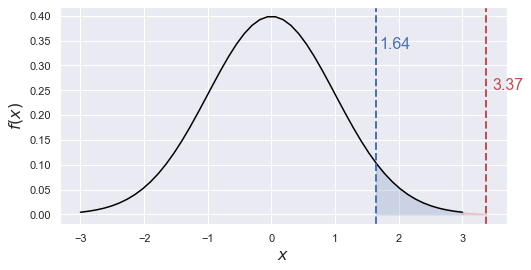

In [661]:
pval=asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger')
print(f'{pval} меньше уровня значимости => Нулевая гипотеза отвергается')

# Машинное обучение

In [662]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
import statistics



Будем ориентироваться на метрики MAE, MAPE, R^2. MSE смотреть не будем, так как у нас есть выбросы, а MSE к ним чувствительна.

In [667]:
#удалили, так как будет слишком много признаков, а эти признаки не так важны
df_ml=df.iloc[:,1:].drop(["улица", "район",'Стандартный налог на продажу'],axis=1) 
df_ml = pd.get_dummies(df_ml, drop_first=True) # ко всем object применится one-hot encoding
df_ml

,цена,общая площадь,жилая площадь,этаж,всего этажей,Дети,холодильник,посудомойка,стиральная машина,мебель в комнатах,...,интернет,кондиционер,душ,ванна,рядом с морем,агенство_Собственник,дороговизна_дорого,дороговизна_средне,размер_маленькая,размер_средняя
0,3000,67.0,0.0,3,9,1,1,0,1,1,...,0,0,0,0,0,1,1,0,0,1
1,2000,52.0,0.0,6,9,0,1,0,1,1,...,1,1,0,1,0,1,0,0,0,1
2,2500,44.0,24.0,7,10,1,1,0,1,1,...,1,1,0,1,0,1,0,1,1,0
3,1400,41.0,22.0,5,9,0,1,0,1,1,...,1,1,0,1,0,0,0,0,1,0
4,3500,80.0,0.0,14,20,1,1,0,1,1,...,1,1,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,2999,60.0,44.0,4,4,1,1,0,1,1,...,1,1,0,1,1,0,0,1,0,1
1376,2500,45.0,0.0,1,2,1,1,0,1,1,...,1,1,1,1,1,0,0,1,0,1
1377,2700,42.0,0.0,4,4,1,1,0,1,1,...,1,1,0,1,0,1,0,1,1,0
1378,1500,26.0,0.0,12,12,1,1,0,1,1,...,1,1,1,0,0,1,0,0,1,0


## KNN

In [668]:
# оно сдохло на последнем прогоне кода :) я хз че сломала
df_train, df_test = train_test_split(df_ml, test_size = 0.2, random_state=42)
y_train = df_train['цена'].to_numpy()
y_test = df_test['цена'].to_numpy()

X_train = df_train.drop('цена', axis=1)
X_test = df_test.drop('цена', axis=1)
model_knn = KNeighborsRegressor(n_neighbors=1)

model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
y_train_knn= model_regression.predict(X_train)
print("Test mae = %.4f" % metrics.mean_absolute_error(y_test, y_pred_knn))
print("Train mae = %.4f \n" % metrics.mean_absolute_error(y_train, y_train_knn))
print("Test mape = %.4f" % metrics.mean_absolute_percentage_error(y_test, y_pred_knn))
print("Train mape = %.4f \n" % metrics.mean_absolute_percentage_error(y_train, y_train_knn))
print("Test R2 = %.4f" % metrics.r2_score(y_test, y_pred_knn)) #типа отнормированное mse
print("Train R2 = %.4f" % metrics.r2_score(y_train, y_train_knn)) 

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 19 is different from 21)

Посмотрим, что происходит с метриками при увеличении числа соседей. Так как есть риск столкнуться с переобучением, если мы будем использовать одного соседа.

In [586]:
#однако здесь в подборе гиперпараметра участвует тест - чтобы замерить качество алгоритма, нужна будет новая тестовая выборка
#оптимальное количество соседей будет где-то посередине
for k in range(1, 20): 
    y_pred = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train).predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2_score=metrics.r2_score(y_test, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    print(f"k = {k}; test mae = {mae:.4f}")
    print(f"k = {k}; test r_2score = {r2_score:.4f}")
    print(f"k = {k}; test mape = {mape:.4f}\n")

k = 1; test mae = 490.6727
k = 1; test r_2score = 0.1618
k = 1; test mape = 0.2075

k = 2; test mae = 504.5818
k = 2; test r_2score = 0.2386
k = 2; test mape = 0.2106

k = 3; test mae = 537.1818
k = 3; test r_2score = 0.1791
k = 3; test mape = 0.2217

k = 4; test mae = 530.7205
k = 4; test r_2score = 0.2114
k = 4; test mape = 0.2201

k = 5; test mae = 531.6173
k = 5; test r_2score = 0.2084
k = 5; test mape = 0.2170

k = 6; test mae = 543.0114
k = 6; test r_2score = 0.2053
k = 6; test mape = 0.2223

k = 7; test mae = 546.3078
k = 7; test r_2score = 0.2024
k = 7; test mape = 0.2230

k = 8; test mae = 560.3170
k = 8; test r_2score = 0.1563
k = 8; test mape = 0.2298

k = 9; test mae = 557.4020
k = 9; test r_2score = 0.1750
k = 9; test mape = 0.2288

k = 10; test mae = 560.3191
k = 10; test r_2score = 0.1797
k = 10; test mape = 0.2305

k = 11; test mae = 555.7851
k = 11; test r_2score = 0.1878
k = 11; test mape = 0.2286

k = 12; test mae = 564.2019
k = 12; test r_2score = 0.1651
k = 12; tes

## Линейная регрессия

In [587]:
#самая простая линейная регрессия до подбора гиперпараметров и кросс-валидации
df_train, df_test = train_test_split(df_ml, test_size = 0.2, random_state=42)
y_train = df_train['цена'].to_numpy()
y_test = df_test['цена'].to_numpy()

X_train = df_train.drop('цена', axis=1)
X_test = df_test.drop('цена', axis=1)
feature_names = df_train.drop('цена',  axis=1).columns
model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)
y_train_pred= model_regression.predict(X_train)
print("Test mae = %.4f" % metrics.mean_absolute_error(y_test, y_pred_regr))
print("Train mae = %.4f \n" % metrics.mean_absolute_error(y_train, y_train_pred))
print("Test mape = %.4f" % metrics.mean_absolute_percentage_error(y_test, y_pred_regr))
print("Train mape = %.4f \n" % metrics.mean_absolute_percentage_error(y_train, y_train_pred))
print("Test R2 = %.4f" % metrics.r2_score(y_test, y_pred_regr)) #типа отнормированное mse
print("Train R2 = %.4f" % metrics.r2_score(y_train, y_train_pred))     


Test mae = 541.1036
Train mae = 532.8972 

Test mape = 0.2226
Train mape = 0.2188 

Test R2 = 0.2120
Train R2 = 0.2989


### Постараемся улучшить линейную регрессию.

In [588]:
from sklearn.model_selection import cross_val_score


In [589]:
cv_scores = cross_val_score(model, X_train, y_train, 
                            cv=10, scoring='neg_mean_absolute_error')

model=LinearRegression()
print("Cross validation scores:\n\t", "\n\t".join("%.20f" % x for x in cv_scores))
print("Mean CV MAE = %.20f" % np.mean(-cv_scores))

#наивный прогноз, с которым можно сравнивать полученные результаты
best_constant = statistics.median(y_train) 
print(f' Наивный прогноз MAE: {metrics.mean_absolute_error(y_test, best_constant * np.ones(y_test.shape))}')
print(f' Наивный прогноз MAPE: {metrics.mean_absolute_percentage_error(y_test, best_constant * np.ones(y_test.shape))}')

Cross validation scores:
	 -520.65412430430387757951
	-648.25952429982123703667
	-525.71410267649412162427
	-558.34637772329801919113
	-505.61612614477814986458
	-662.23071253614727993408
	-487.36762078761711336483
	-479.19489803479626743865
	-549.31319678176316756435
	-508.98357276423308803714
Mean CV MAE = 544.56802560532537427207
 Наивный прогноз MAE: 558.4318181818181
 Наивный прогноз MAPE: 0.228755876492929


### Визуализация весов, соответствующая признаку после стандартизации:

In [590]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [591]:
numeric_data = X_train.select_dtypes([np.number])

numeric_data_mean = numeric_data.mean()  # считаем средние на трэйне
numeric_features = numeric_data.columns

In [592]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

In [593]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test MAE = %.20f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.20f" % metrics.mean_absolute_error(y_train, y_train_pred))

Test MAE = 541.10363119194414593949
Train MAE = 532.89715522328208407998


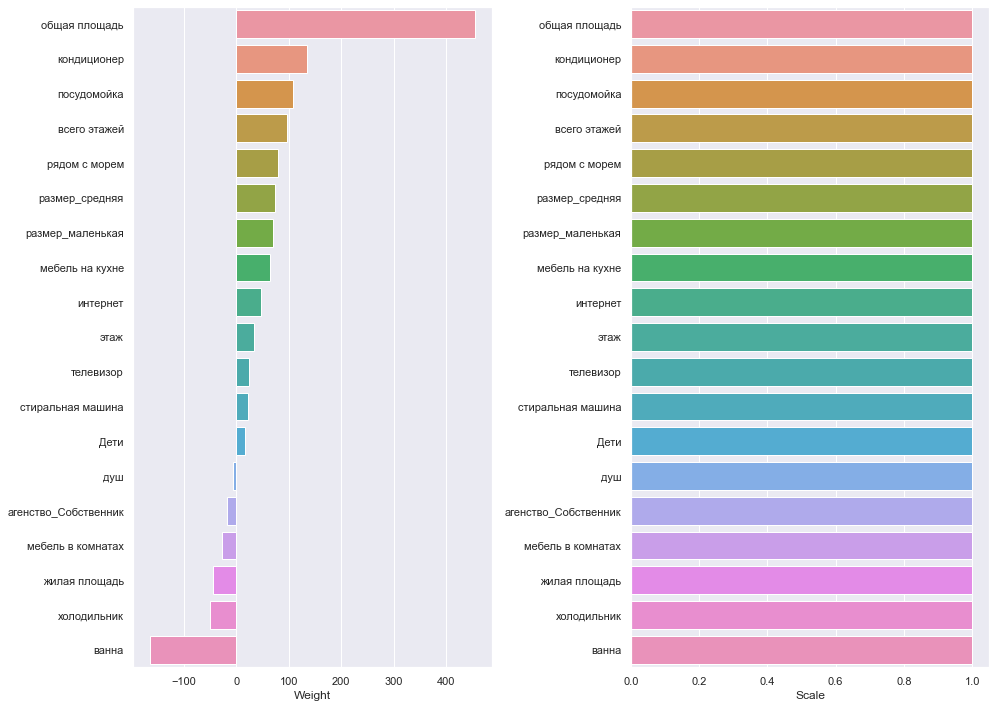

In [594]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

In [595]:
print("Test R2 = %.4f" % r2_score(y_test, y_pred))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))

Test R2 = 0.2120
Train R2 = 0.2989


### Ridge-регрессия

In [596]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV

Попробуем произвести полиноминальное преобразование, чтобы у признаков были большие веса, а риск переобучения снизился.

In [597]:
polinom_transform = PolynomialFeatures(2, include_bias=False)

X_train_poly = polinom_transform.fit_transform(X_train_scaled)
X_test_poly = polinom_transform.transform(X_test_scaled)

Best alpha = 297.6351


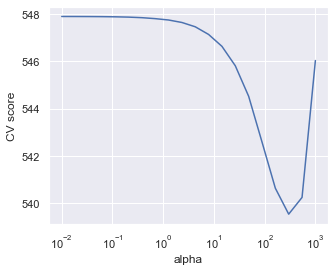

In [598]:
#как нашли лучшую альфу
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Ridge(), [{"alpha": alphas}], 
    scoring="neg_mean_absolute_error", cv=10
)
searcher.fit(X_train_scaled, y_train)

best_alpha1 = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha1)

plt.figure(figsize=(5,4))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score");

Test MAE = 564.6279
Train MAE = 457.0679
Test r2 = 0.1158
Train r2 = 0.5322


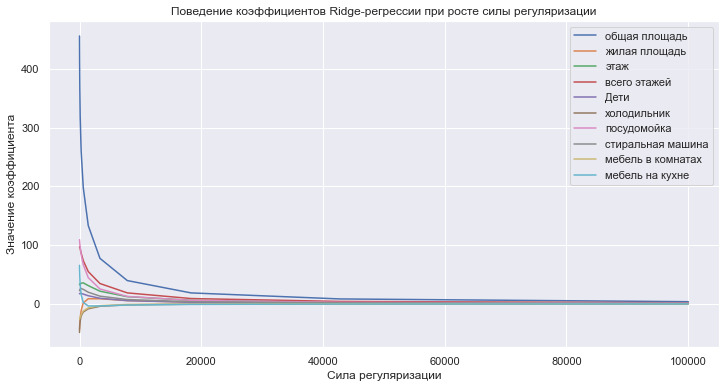

In [599]:
model = Ridge(alpha=   297.6351) #подставили лучшую альфу

model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
y_train_pred = model.predict(X_train_poly)

print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_train_pred))
print("Test r2 = %.4f" % metrics.r2_score(y_test, y_pred))
print("Train r2 = %.4f" % metrics.r2_score(y_train, y_train_pred))
alphas = np.logspace(-2, 5, 20)
coefs = []

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
df_coef = pd.DataFrame(coefs)
df_coef.columns = numeric_features
df_coef.index = alphas

df_coef[numeric_features[:10]].plot(figsize=(12,6))
plt.xlabel("Сила регуляризации")
plt.ylabel("Значение коэффициента")
plt.title('Поведение коэффициентов Ridge-регрессии при росте силы регуляризации');

### Lasso-регрессия


In [600]:
from sklearn.linear_model import Lasso

Best alpha = 48.3293


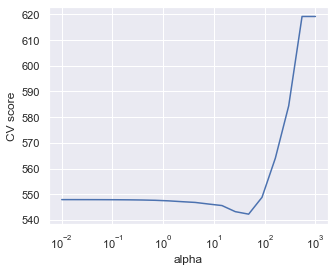

In [601]:
#как нашли лучшую альфу
alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(
    Lasso(), [{"alpha": alphas}], 
    scoring="neg_mean_absolute_error", cv=10
)
searcher.fit(X_train_scaled, y_train)

best_alpha2 = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha2)

plt.figure(figsize=(5,4))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score");

Test MAE = 542.1053
Train MAE = 498.7415
Test r2 = 0.2058
Train r2 = 0.4386


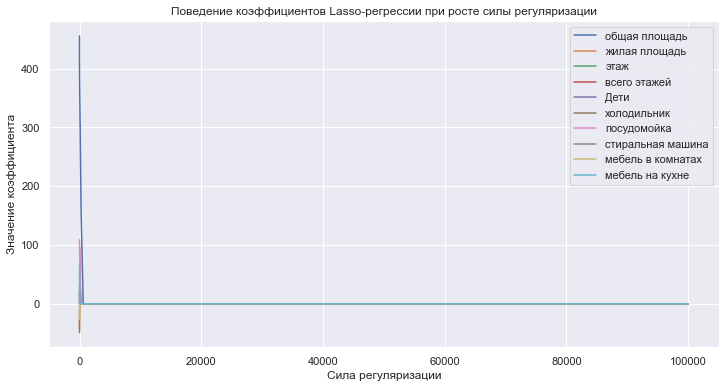

In [602]:
model = Lasso(alpha=48.3293)

model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
y_train_pred = model.predict(X_train_poly)

print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_train_pred))
print("Test r2 = %.4f" % metrics.r2_score(y_test, y_pred))
print("Train r2 = %.4f" % metrics.r2_score(y_train, y_train_pred))
alphas = np.logspace(-2, 5, 20)
coefs = []

for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
df_coef = pd.DataFrame(coefs)
df_coef.columns = numeric_features
df_coef.index = alphas

df_coef[numeric_features[:10]].plot(figsize=(12,6))
plt.xlabel("Сила регуляризации")
plt.ylabel("Значение коэффициента")
plt.title('Поведение коэффициентов Lasso-регрессии при росте силы регуляризации');

### Pipeline

In [603]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [581]:
y = df["цена"]
X = df.drop(columns=["цена"])
feature_names = X.columns.values
numeric_features = X.select_dtypes([np.number]).columns
X = X[numeric_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [604]:

simple_pipeline = Pipeline([('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha1))
])

model = simple_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_train_pred))

Test MAE = 536.2449
Train MAE = 530.4751


In [605]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric_features),    
    ('ohe', OneHotEncoder(handle_unknown="ignore", drop="first") , categorical_features)
])
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.fit_transform(X_train).shape)

Size before OneHot: (877, 19)
Size after OneHot: (877, 19)


In [606]:
lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_pred =model.predict(X_train)
print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
print("Train MAE = %.4f" % metrics.mean_absolute_error(y_train, y_train_pred))

Test MAE = 540.9004
Train MAE = 532.6827


In [607]:
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)


Zero weights in Lasso: 0


Best alpha = 29.7635


Text(0, 0.5, 'CV score')

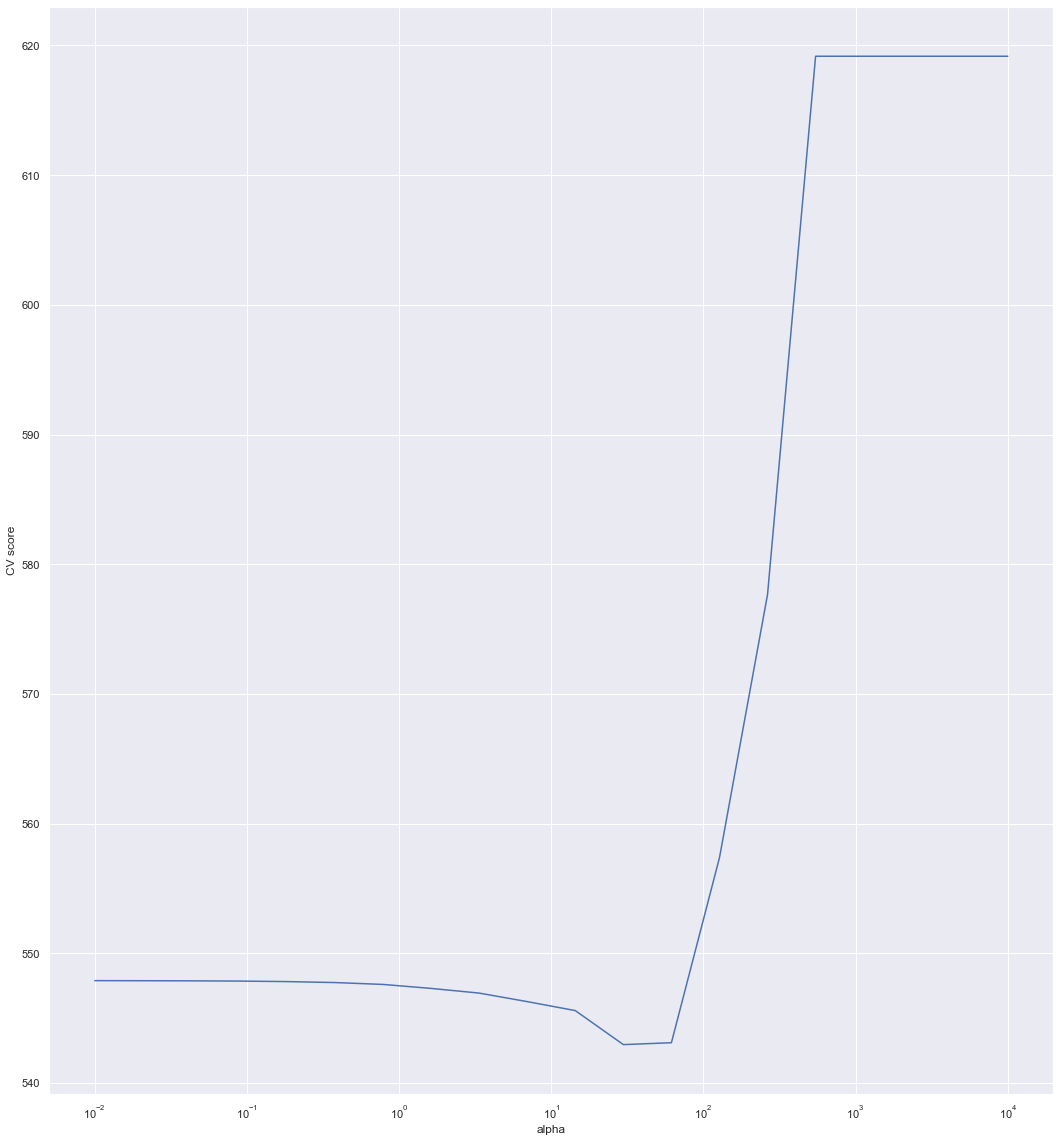

In [608]:
alphas = np.logspace(-2, 4, 20)
searcher = GridSearchCV(lasso_pipeline, [{"regression__alpha": alphas}],
                        scoring="neg_mean_absolute_error", cv=10, n_jobs=-1)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [610]:
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha2))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test MAE = %.4f" % metrics.mean_absolute_error(y_test, y_pred))
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Test MAE = 539.8868
Zero weights in Lasso: 11


### типа бустинг без поиска параметров..

In [612]:
from sklearn.ensemble import GradientBoostingRegressor 

params = {'n_estimators':200,
          'max_depth':12,
          'criterion':'mse',
          'learning_rate':0.03,
          'min_samples_leaf':16,
          'min_samples_split':16
          }
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)
### Вычисляем точность
train_accuracy_score=gbr.score(X_train,y_train)
print(train_accuracy_score)

test_accuracy_score=gbr.score(X_test,y_test)
print(test_accuracy_score)

### Предсказание
y_pred = gbr.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_pred)
print("MAE: %.2f" % mae)
print(metrics.r2_score(y_test,y_pred))
#лучший результат по МАЕ И R^2

0.7111758848864271
0.3077490235044179
MAE: 498.46
0.3077490235044179


Результаты КРИНЖ. Почти везде r2_score меньше 0.2)) а МАЕ около 500, что огромная ошибка, если у нас средняя цена за сутки - 2600.

Все очень плохо, даже сравнивая с наивными результатами, лучший вариант в последней ячейке через градиентный бустинг, и то, где не подбирались параметры. Я полагаю, это из-за того что оооочень много булевых переменных, это конечно интересно, но надо было побольше числовой информации собирать изначально. К тому же данных не так много, люди очень много ошибок делают в заявлениях, или заполняют не полностью их (а чем-то заполнять эти пропуски тоже некорректно), как-то так